## 인공 신경망(Artificial Neural Network) 훑어보기
- https://wikidocs.net/24987

### 피드 포워드 신경망(Feed-Forward Neural Network, FFNN)
- 다층 퍼셉트론(MLP)과 같이 오직 입력층에서 출력층 방향으로 연산이 전개되는 신경망
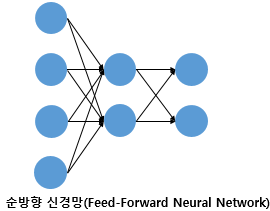 <br>  
- RNN: 은닉층의 출력값을 출력층으로도 값을 보내지만, 동시에 은닉층의 출력값이 다시 은닉층의 입력으로 사용
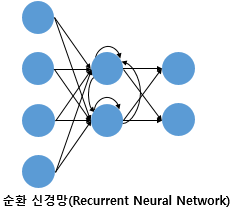

### 전결합층(Fully-connected layer, FC, Dense layer)
- 전결합층(=완전연결층): 어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결돼 있는 층
    - FC라고도 부름
    - 다층 퍼셉트론의 모든 은닉층과 출력층은 전결합층
    - 밀집층(Dense layer) 이라고 부름
    - Dense()

### 활성화 함수(Activation Function)
- 은닉층과 출력층의 뉴런에서 출력값을 결정하는 함수
    - 앞서 나온 퍼셉트론에서는 계단함수를 통해 출력값이 0이 될지, 1이 될지를 결정했음

#### 활성화 함수의 특징 - 비선형 함수(Nonlinear function)
- 특징: 선형 함수가 아닌 비선형 함수여야 한다는 점
    - 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없기 때문
    - 예) y=wx라고 가정, 은닉층 두 개 추가시
    - y= w^3x 이므로 또 y=kx 형식으로 표현 가능
    - 이 경우, 선형 함수로 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이가 없음
- 종종 활성화 함수를 사용하지 않는 층을 비선형 층들과 함께 인공 신경망의 일부로서 추가하는 경우도 있음
    - 학습 가능한 가중치가 새로 생긴다는 점에서 의미
    - 이와 같이 선형 함수를 사용한 층을 활성화 함수를 사용하는 은닉층과 구분하기 위해서
        - 선형층(linear layer)이나 투사층(projection layer) 등의 다른 표현을 사용
        - 임베딩 층(embedding layer)도 일종의 선형층
        - 임베딩 층에는 활성화 함수가 존재하지 않음
    - 활성화 함수를 사용하는 일반적인 은닉층을 선형층과 대비되는 표현을 사용하면 비선형층(nonlinear layer)

### 계단 함수(Step function)
- 계단 함수는 거의 사용되지 않지만 퍼셉트론을 통해 인공 신경망을 처음 배울 때 접하게 되는 활성화 함수

In [2]:
# 파이썬을 통해 그려보기
import numpy as np
import matplotlib.pyplot as plt

C:\Users\JiyoonLee\AppData\Local\Temp\ipykernel_10824\2601413359.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


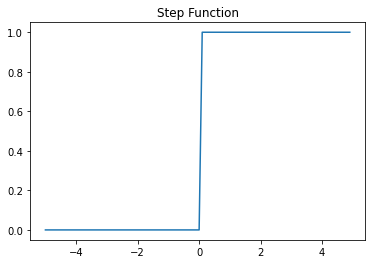

In [2]:
def step(x):
    return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

#### 시그모이드 함수(Sigmoid function)와 기울기 소실
- 시그모이드 함수를 사용한 인공 신경망
    - 이 있다고 가정
    - 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산
    - 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산
    - 이 손실(오차)을 미분을 통해서 기울기(gradient)를 구하고, 이를 통해 출력층에서 입력층 방향으로 가중치와 편향을 업데이트 하는 과정인 역전파(back propagation)를 수행
    - 역전파 과정에서 인공 신경망은 경사 하강법을 사용
- 시그모이드 함수의 문제점: 미분을 해서 기울기(gradient)를 구할 때 발생

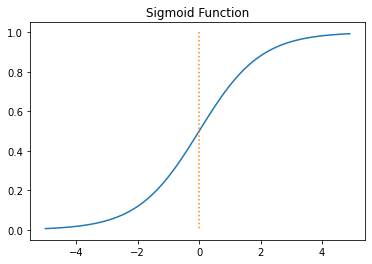

In [4]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

- 시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해지는 모습
- 시그모이드 함수를 미분한 값은 적어도 0.25 이하
    - 주황색 구간에서는 미분값이 0에 가까운 아주 작은 값
    - 초록색 구간에서의 미분값은 최대값이 0.25 <br>
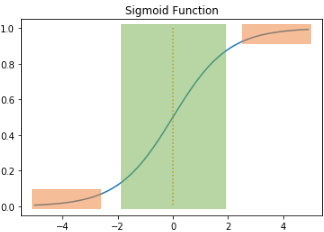 <br>  
- 기울기 소실(Vanishing Gradient) 문제
    - 시그모이드 함수를 활성화 함수로하는 인공 신경망의 층을 쌓는다면
    - 가중치와 편향을 업데이트 하는 과정인 역전파 과정에서 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없음
    - 즉, 매개변수 w 업데이트 되지 않아 학습 불가
    - 앞단으로 갈수록 기울기가 제대로 전파되지 않는 모습
- 시그모이드 함수의 은닉층에서의 사용은 지양
- 시그모이드 함수는 주로 이진 분류를 위해 출력층에서 사용
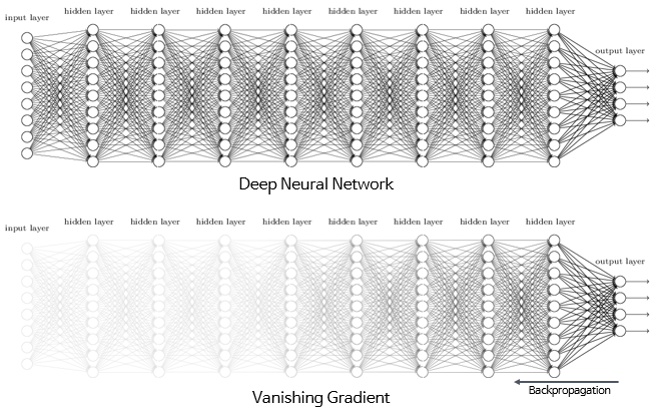

#### 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)
- 하이퍼볼릭탄젠트 함수(tanh)는 입력값을 -1과 1사이의 값으로 변환
- -1과 1에 가까운 출력값을 출력할 때, 시그모이드 함수와 같은 문제가 발생
- 시그모이드와의 차이
    - 시그모이드 함수와는 달리 0을 중심
    - 하이퍼볼릭탄젠트 함수를 미분했을 때의 최대값은 1로 시그모이드 함수의 최대값인 0.25보다는 큼
    - 미분했을 때, 시그모이드 함수보다는 전반적으로 큰 값
    - 시그모이드 함수보다는 기울기 소실 증상이 적은 편
- 은닉층에서 시그모이드 함수보다는 선호됨

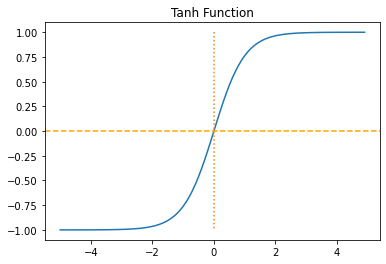

In [3]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

#### 렐루 함수(ReLU)
- 인공 신경망의 은닉층에서 가장 인기있는 함수
- 수식: f(x)=max(0,x)
- 특징: 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환
    - 출력값이 특정 양수값에 수렴하지 않음
    - 0이상의 입력값의 경우에는 미분값이 항상 1
- 깊은 신경망의 은닉층에서 시그모이드 함수보다 훨씬 더 잘 작동
- (시그모이드, 하이퍼볼릭탄젠트와 달리) 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠름
- 문제점:
    - 입력값이 음수면 기울기. 즉, 미분값도 0
    - 이 뉴런은 다시 회생하는 것이 매우 어려움
    - 이를 죽은 렐루(dying ReLU)라고 함

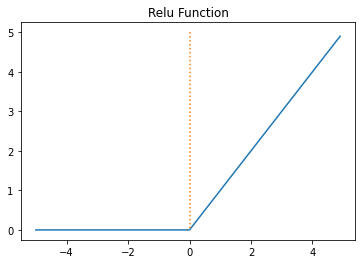

In [4]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

#### 리키 렐루(Leaky ReLU)
- 죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장
- Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환
- 수식: f(x)=max(ax,x)로 아주 간단
- a는 하이퍼파라미터로 Leaky('새는') 정도를 결정
    - 일반적으로는 0.01의 값
    - '새는 정도'라는 것은 입력값의 음수일 때의 기울기를 비유
    - 아래 출력과 같이 입력값이 음수라도 기울기가 0이 되지 않으면 ReLU는 죽지 않음

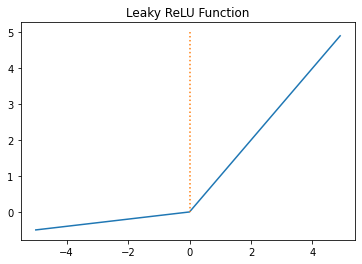

In [5]:
a = 0.1 # 명확히 보여주기 위해 0.1로 설정

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

#### 소프트맥스 함수(Softmax function)
- 은닉층에서는 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적
- 소프트맥스 함수는 시그모이드 함수처럼 출력층에서 주로 사용
    - 시그모이드 함수: 이진 분류 문제에 사용
    - 소프트맥스 함수: 다중 클래스 분류 문제에 주로 사용

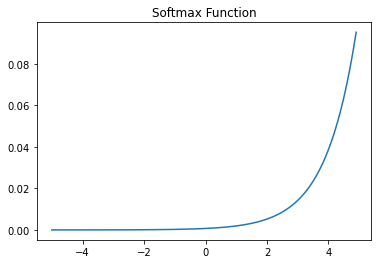

In [6]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()